# Strategic Analysis of Customer Churn in Telecom
## 1. Project Overview & Business Impact
**Objective:** Identify key indicators of customer attrition to develop proactive retention strategies.
**Dataset:** Telco Customer Churn (IBM Sample Data).

### Table of Contents
1. [Environment Setup](#setup)
2. [Data Acquisition & Initial Profiling](#profiling)
3. [Data Cleaning & Type Conversion](#cleaning)
4. [Exploratory Data Analysis (EDA)](#eda)
5. [Key Insights & Recommendations](#insights)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Professional Plotting Settings
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)
warnings.filterwarnings('ignore')

# Link to dataset source (Professional touch)
DATA_URL = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_URL)
df.head()


In [2]:
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Dataset Overview


In [3]:
df.shape


(7043, 21)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 4. Exploratory Data Analysis


### Churn Distribution


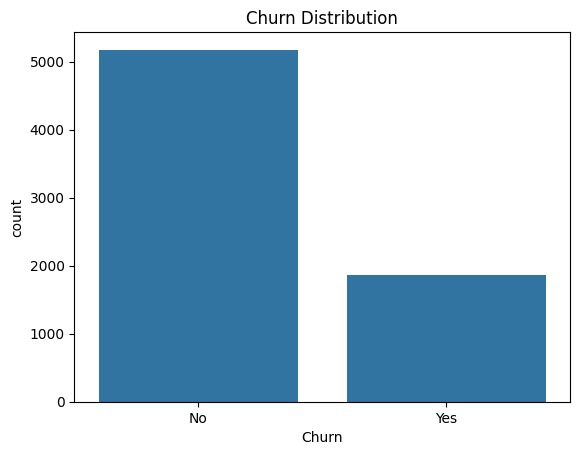

In [13]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


### Tenure vs Churn


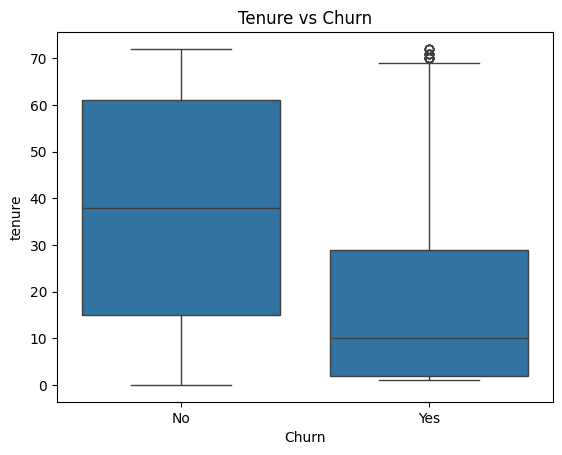

In [14]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


### Monthly Charges vs Churn


### Churn Rate Analysis


In [16]:
churn_rate = df["Churn"].value_counts(normalize=True) * 100
churn_rate


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

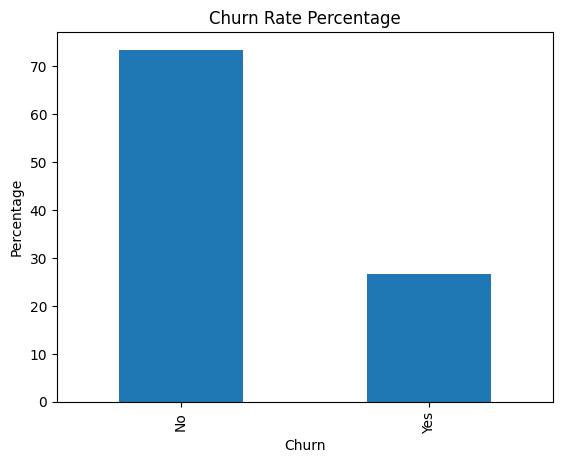

In [17]:
churn_rate.plot(kind="bar")
plt.ylabel("Percentage")
plt.title("Churn Rate Percentage")
plt.show()


### Customer Lifecycle Analysis (Tenure Groups)


In [20]:
bins = [0, 12, 24, 48, 72]
labels = ["0-1 year", "1-2 years", "2-4 years", "4-6 years"]

df["tenure_group"] = pd.cut(df["tenure"], bins=bins, labels=labels)


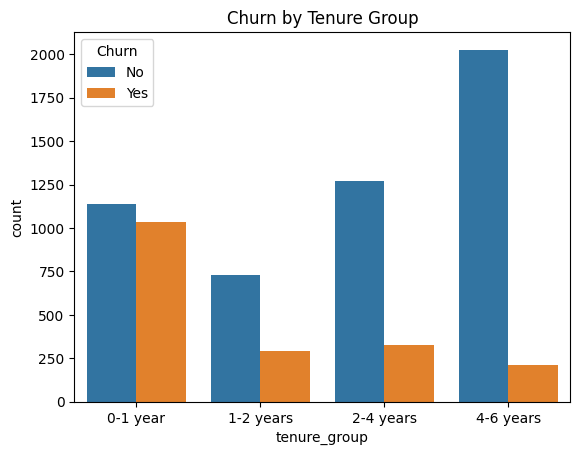

In [19]:
sns.countplot(x="tenure_group", hue="Churn", data=df)
plt.title("Churn by Tenure Group")
plt.show()


### Pricing Segmentation Analysis


In [22]:
df["price_segment"] = pd.qcut(
    df["MonthlyCharges"],
    q=3,
    labels=["Low", "Medium", "High"]
)


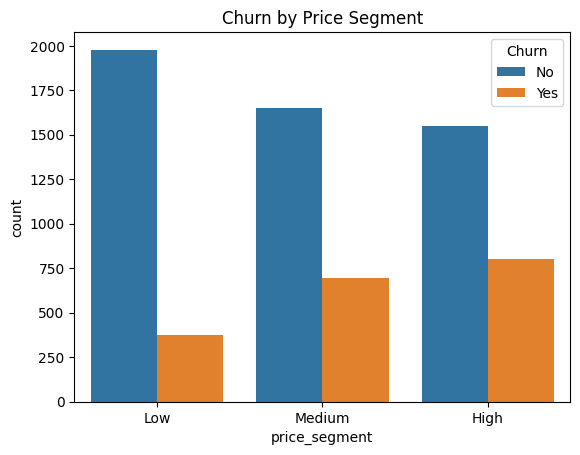

In [23]:
sns.countplot(x="price_segment", hue="Churn", data=df)
plt.title("Churn by Price Segment")
plt.show()


### Correlation Analysis


In [26]:
df["TotalCharges"] = df["TotalCharges"].astype(str)
df["TotalCharges"] = df["TotalCharges"].str.strip()
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [27]:
df = df.dropna(subset=["TotalCharges"])


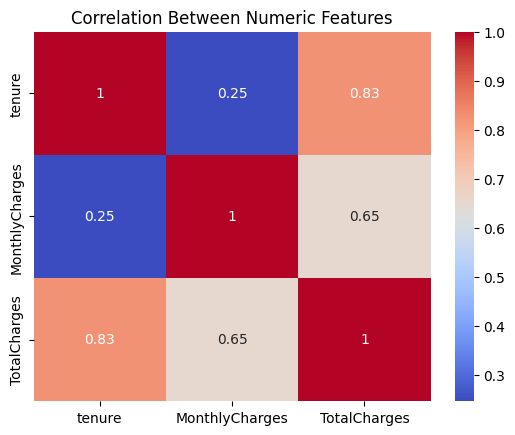

In [28]:
corr = df[["tenure", "MonthlyCharges", "TotalCharges"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Features")
plt.show()
